In [58]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [59]:
# Load the saved Keras model
model = load_model('models/dataset1model.h5')

In [60]:
# Define the image folder path and output CSV file path
#image_folder = 'dataset1/unknown_images'
image_folder = 'dataset2/images'
#csv_path = 'dataset1/unknown_images/results.csv'
csv_path = 'dataset2/model_results.csv'

# Load ground truth labels
ground_truth_df = pd.read_csv('dataset2/image_classes.csv')

In [72]:
# Initialize empty lists to store the image names and predicted classes
image_names = []
predicted_classes = []
accuracies = []
recalls = []
f1_scores = []

ground_truth_labels = []

In [73]:

# Iterate through all images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image and preprocess it
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (256, 256))
        image = np.expand_dims(image, axis=0)
        image = image / 255.0

        # Make predictions on the image using the loaded model
        predictions = model.predict(image)
        

        # Get the index of the class with the highest probability
        class_index = np.argmax(predictions)

        # Get the accuracy of the prediction
        accuracy = predictions[0][class_index]
        
         # Get the predicted class and probability
        if predictions < 0.5: 
            mclass = 'Normal'
        else:
            mclass = 'Sick'

            
        # Calculate accuracy, recall, and F1 score
        true_label = ground_truth_df[ground_truth_df['patient'] == filename]['diagnosis'].values[0]
        accuracy = accuracy_score([true_label], [mclass])
        recall = recall_score([true_label], [mclass], pos_label='Normal', zero_division=1)
        f1 = f1_score([true_label], [mclass], pos_label='Sick')
        
        # Add the image name and predicted class to the lists
        image_names.append(filename)
        predicted_classes.append(mclass)
        accuracies.append(accuracy)
        recalls.append(recall)
        f1_scores.append(f1)
        
        ground_truth_labels.append( ground_truth_df[ground_truth_df['patient'] == filename]['diagnosis'])
        
        # Print the filename and predicted class
        print(f'{filename}, {mclass}, {true_label}, {accuracy}, {recall}, {f1}')
                

sick_eff0.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff1.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff10.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff100.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff101.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff102.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff103.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff104.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff105.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff106.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff107.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff108.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff109.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff11.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff110.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff111.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff12.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff13.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff14.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff15.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff16.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff17.png, Sick, Normal, 0.0, 0.0, 0.0
sick_eff18.png, Sick, 

sick_eif69.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif7.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif70.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif71.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif72.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif73.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif74.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif75.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif76.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif77.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif78.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif79.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif8.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif80.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif81.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif82.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif83.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif84.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif85.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif86.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif87.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif88.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif89.png, Sick, Sick, 1.0, 1.0, 1.0
sick_eif9.png, Sick, Sick, 1.0, 1.0,

In [74]:
# Create a results DataFrame
results_df = pd.DataFrame({
    'Image': image_names,
    'Predicted Class': predicted_classes,
    'Accuracy': accuracies,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Save the results to a CSV file
results_df.to_csv(csv_path, index=False)

## Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Calculate the confusion matrix
cm = confusion_matrix(ground_truth_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  0 112]
 [ 12 100]]


In [79]:
# Define class labels for the confusion matrix
class_labels = ['Normal', 'Sick']

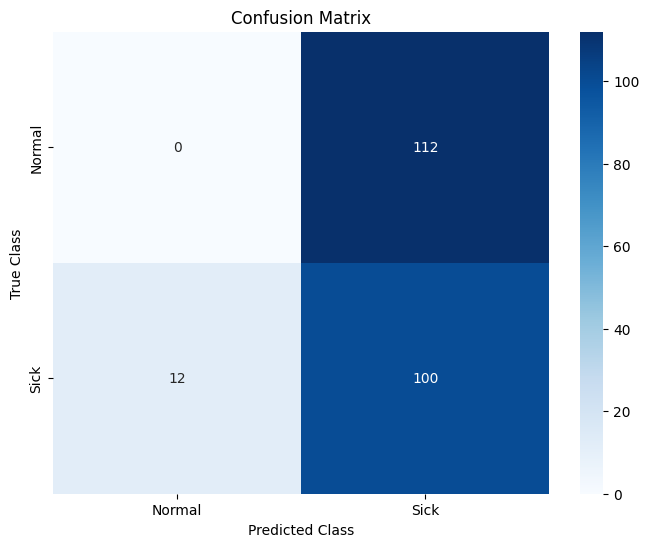

In [80]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

## Accuracy, Recall, and F1 Score Bar Plot

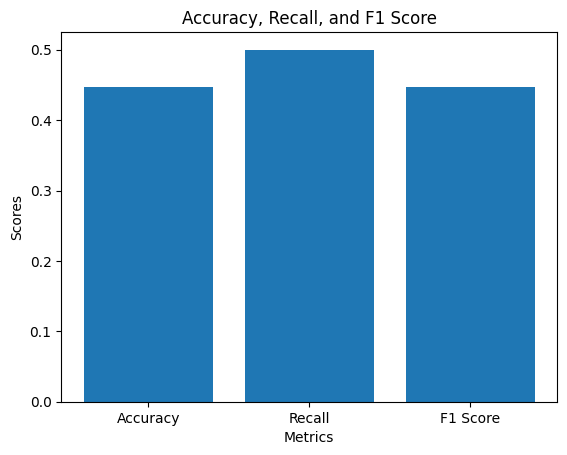

In [81]:
import matplotlib.pyplot as plt

# Calculate the average accuracy, recall, and F1 score
average_accuracy = sum(accuracies) / len(accuracies)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1_scores) / len(f1_scores)

# Define the metrics and their corresponding values
metrics = ['Accuracy', 'Recall', 'F1 Score']
values = [average_accuracy, average_recall, average_f1]

# Create a bar plot
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Accuracy, Recall, and F1 Score')
plt.show()